# Session 8 - Introduction to Machine Learning

Goal: the one thing that is difficult to guess is the price, we will try to learn the price. It's a numeric variable, when there is a very large amount values we can say that is continuous. To guess a continuous value we use regression. 

Simple case: 2 class problem - categorize the price

In [141]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [142]:
df = pd.read_csv("UTSEUS-anjuke-real-estate-baoshan.csv")

In [143]:
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


## Clean df 

Remove id, adress (we have long and lat), onesquaremeter, tags, district, neighborhood, done

The target variable is "price". We have to predict it y learning rules from df using decision trees.

In [144]:
X = df[['longitude', 'latitude', 'bedroom', 'room', 'surface']]
Y = df[['price']]

In [145]:
#plt.hist(Y, 100)

## Bins

In [146]:
medianY = np.median(Y)

In [147]:
Z = pd.DataFrame.copy(Y)
Z[Y<medianY] = "cheap"
Z[Y>=medianY] = "expensive"

In [148]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Z)

In [149]:
clf.predict([[121, 31, 3, 5, 200]])

array(['expensive'], dtype=object)

In [150]:
df['class'] = Z
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done,class
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1,cheap
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1,cheap
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1,expensive
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1,expensive
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1,expensive


## Modeling

# Create a column is_train and I do a random between 0 and 1 and I put the ratio I want : attribute a random number for each line 
# and if it <= .75 it puts true otherwise false
X['is_train'] = np.random.uniform(0, 1, len(X)) <= .75
X['is_train']
# Regardless of the warning

train, test = X[X['is_train']==True], [X['is_train']==False]

Random + Split df in train and test

In [151]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [152]:
len(test)+len(train)

34416

In [153]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[['longitude', 'latitude', 'bedroom', 'room', 'surface']], train['class'])

In [154]:
prediction = clf.predict(test[['longitude', 'latitude', 'bedroom', 'room', 'surface']])

In [155]:
np.mean(prediction == test['class'])

0.9472154963680387

## Crossed-validation

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = tree.DecisionTreeClassifier(max_depth=5) #increasing the depth to increase perf, but be careful to not overfit
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
scores
np.mean(scores)

0.9115630447414294

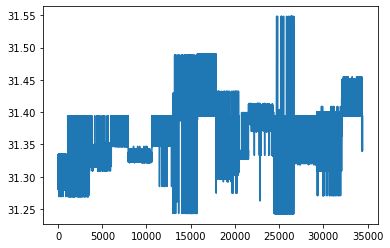

In [160]:
plt.plot(X["latitude"])

[Text(167.4, 181.2, 'X[4] <= 76.5\nentropy = 0.5\nsamples = 24091\nvalue = [12004, 12087]'),
 Text(83.7, 108.72, 'X[4] <= 63.5\nentropy = 0.259\nsamples = 12250\nvalue = [10374, 1876]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.094\nsamples = 8057\nvalue = [7659, 398]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.456\nsamples = 4193\nvalue = [2715, 1478]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 31.411\nentropy = 0.237\nsamples = 11841\nvalue = [1630, 10211]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.158\nsamples = 10663\nvalue = [921, 9742]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.479\nsamples = 1178\nvalue = [709, 469]')]

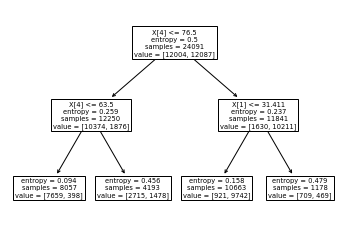

In [170]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(train[['longitude', 'latitude', 'bedroom', 'room', 'surface']], train['class'])
tree.plot_tree(clf)

Try to get the best parameters: GridSearchCV

In [171]:
from sklearn.model_selection import GridSearchCV